---
# <span style="color:pink">DS3000B - DS9000B Midterm Exam</span>

## <span style="color:pink">Student ID #: _________</span>

## <span style="color:pink">Grade: __ / 100</span>

## <span style="color:pink">General Comments</span>

- This exam integrates knowledge and skills acquired in the first half of the term. 

- Use of chatbots, *e.g.* ChatGPT, is prohibited.

- You are allowed to use any document and source on your computer and the internet, but you are **not** allowed to share documents, post questions to online forums (this includes use of homework helpers such as Chegg), or communicate in any way with people inside or outside the venue. 

- Having any communication tools (e.g. Discord, Teams, Outlook etc.) either web-based or app-based open on your computer (or having them running in the background) is considered an act of cheating and you will receive 0 mark for the exam.

- To finish the midterm in the alloted time, you will have to work efficiently. Read the entirety of each question carefully.

- You must have your work submitted by 7:00PM to the "Test and Quizzes" section of the course's site on OWL, *i.e.* the same place where you originally downloaded the notebook. Late submission will be scored with 0 mark. Therefore, to avoid technical difficulties, start your submission, at the latest, five to ten minutes before the deadline.  

- Some questions demand a **written answer** - answer these in a full English sentence in markdown cells. 

- For your figures, ensure that all axes are labeled in an informative way. To facilitate interpretation, there could be a situation where you should limit the x-axis and/or y-axis to zoom-in.

- At the end, before submitting to OWL, restart the kernel and rerun all cells to make sure that your notebook runs error free and as expected. 

## <span style="color:pink">Additional Guidance</span>

- The "Toolbox" cells offer almost every tool that you need to answer the questions, however, depending on your answers, there could be a couple of instances where you'd need to bring in more tools - unless a question imposes some restrictions.
- If at any point you are asking yourself "are we supposed to...", write your assumptions clearly and proceed according to them.
- If you have no clue how to approach a question, skip it, and move on. Revisit the skipped one(s) after you are done with the other questions.
- Where applicable, take advantage of the argument `n_jobs=-1` to speed up processes with parallel computing.
- To navigate within the notebook, better to take advantage of the notebook's table of contents (normally on the left side of the screen). It saves you time compared to pure mouse scrolling. In VScode, it is nested under the "OUTLINE" tab which is by default minimized unless you click it to maximize.


---
## <span style="color:orange">Global Toolbox</span>

In [1]:
import warnings; warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np; seed = 2023; np.random.seed(seed)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
%matplotlib inline

---
## Question 1 - <span style="color:green">[60]</span> - Regression
Connor Andrew McDavid is a Canadian professional ice hockey player and captain of the Edmonton Oilers of the National Hockey League (NHL). The data file `hockey.csv` provides a reduced version of Connor's game by game career data available on this [website](https://moneypuck.com/data.htm). Each row represents the stats of one game and we want to build a regression model to predict how much time does Connor play each game.

The dataset has the following attributes:

|#| Attribute | Description |
| --- | --- | --- |
|0|`opposingTeam`|The team the player played against.|
|1|`home_or_away`|Whether a game was played home or away.|
|2|`icetime`|Total time the player played in seconds.|
|3|`gameScore`|Game score rating.|
|4|`I_F_primaryAssists`|Primary Assists the player has received on teammates' goals.|
|5|`I_F_secondaryAssists`|Secondary Assists the player has received on teammates' goals.|
|6|`I_F_shotAttempts`|Shot attempts. Includes player's shots on goal, missed shots, and blocked shot attempts.|
|7|`I_F_goals`|Number of goals the player scored.|
|8|`I_F_rebounds`|Rebound shot attempts. These must occur within 3 seconds of a previous shot.|
|9|`I_F_reboundGoals`|Goals from rebound shot attempts.|
|10|`I_F_freeze`|Puck freezes after a player's shot. The  number of puck freezes by goalies after the player's unblocked shot attempts.|
|11|`I_F_playContinuedInZone`|Number of times the play continues in the offensive zone after the player's shot besides an immediate rebound shot.|
|12|`I_F_playContinuedOutsideZone`|Number of times the play goes outside the offensive zone after the player's shot.|
|13|`I_F_savedShotsOnGoal`|Number of the player's unblocked shots that were saved by the goalie.|
|14|`I_F_savedUnblockedShotAttempts`|Number of the player's unblocked shots that were saved by the goalie or missed the net.|
|15|`I_F_penalityMinutes`|Number of penalty minutes the player has received.|
|16|`I_F_faceOffsWon`|Number of faceoffs the player has won.|
|17|`I_F_hits`|Number of hits the player has given.|
|18|`I_F_takeaways`|Number of takeaways the player has taken from opponents.|
|19|`I_F_giveaways`|Number of giveaways the player has given to other team.|
|20|`I_F_lowDangerGoals`|Goals from low danger shots.|
|21|`I_F_mediumDangerGoals`|Goals from medium danger shots.|
|22|`I_F_highDangerGoals`|Goals from high danger shots.|
|23|`I_F_unblockedShotAttempts`|All shot attempts that weren't blocked.|
|24|`I_F_dZoneGiveaways`|Giveaways in the team's defensive zone.|
|25|`penalityMinutesDrawn`|Number of penalty minutes the player has drawn.|
|26|`penaltiesDrawn`|Number of penalties the player has drawn.|

### <span style="color:orange">Q1 Toolbox</span>

In [2]:
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np;
import seaborn as sns;
import matplotlib.pyplot as plt;


### Q1.1 - <span style="color:red">[6]</span> - Load the dataset and answer the following questions according to the data:

1. How many games in total has Connor played? How many of them were "HOME" and how many of them were "AWAY" matches?
2. On average, how many minutes per game Connor's been on ice?
4. How many unique teams has Connor played against?

In [3]:
df = pd.read_csv('hockey.csv')
gameplay = df.shape[0]
avg = np.round(np.average(df['icetime'])/60, 3)
uniqueTeamPlayedagainse = np.unique(df["opposingTeam"]).__len__()
print("Connor played ", gameplay," games, \nConnor has been for avgerage ", avg, " minutes on ice\nConnor played against ", uniqueTeamPlayedagainse, " teams"
)

Connor played  2725  games, 
Connor has been for avgerage  8.703  minutes on ice
Connor played against  35  teams


### Q1.2 - <span style="color:red">[14]</span> - We want to retain the categorical attributes in the matrix of features, hence apply a proper encoding to take care of them. Then, split the data into training and test sets with `test_size=0.3` and `random_state=seed`. Instantiate an object from the `sklearn.linear_model.LinearRegression` class with default arguments, train, and report its training RMSE, test RMSE, as well as the mean and standard deviation of its shuffled cross-validated RMSE over 5 folds. Comment on the performance of this model in the context of overfitting/underfitting.

For shuffling, use the notebook random seed (defined in "Global Toolbox" as `seed`). 

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import mean_squared_error

# apply one-hot encoding
df_encoded = pd.get_dummies(df, columns=['opposingTeam', 'home_or_away'])

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df_encoded.drop('icetime', axis=1), df_encoded['icetime'], test_size=0.3, random_state=seed)

# instantiate an object from the sklearn.linear_model.LinearRegression class with default arguments
lr = LinearRegression()

# train the model
lr.fit(X_train, y_train)

# report its training RMSE, test RMSE, as well as the mean and standard deviation of its shuffled cross-validated RMSE over 5 folds
train_rmse = mean_squared_error(y_train, lr.predict(X_train), squared=False)
test_rmse = mean_squared_error(y_test, lr.predict(X_test), squared=False)

cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=seed)
cv_scores = cross_val_score(lr, df_encoded.drop('icetime', axis=1), df_encoded['icetime'], cv=cv, scoring='neg_root_mean_squared_error')
cv_mean = -cv_scores.mean()
cv_std = cv_scores.std()

print(f'Training RMSE: {train_rmse:.3f}')
print(f'Test RMSE: {test_rmse:.3f}')
print(f'CV mean RMSE: {cv_mean:.3f}')
print(f'CV RMSE std: {cv_std:.3f}')


Training RMSE: 213.646
Test RMSE: 226.569
CV mean RMSE: 222.732
CV RMSE std: 4.209


### Q1.3 - <span style="color:red">[7]</span> - Report the top 2 positively correlated features as well as the top negatively correlated feature with respect to the target variable. In writing, interpret the relationships of both groups with respect to the target variable.

In [5]:
corr_matrix = df_encoded.corr()
corr_matrix['icetime'].sort_values(ascending=False)

icetime                           1.000000
I_F_shotAttempts                  0.806681
I_F_faceOffsWon                   0.796207
I_F_unblockedShotAttempts         0.779591
I_F_savedUnblockedShotAttempts    0.762736
                                    ...   
opposingTeam_L.A                 -0.004541
opposingTeam_COL                 -0.004815
opposingTeam_PHI                 -0.006273
opposingTeam_SJS                 -0.008707
opposingTeam_CBJ                 -0.010477
Name: icetime, Length: 62, dtype: float64

### Q1.4 - <span style="color:red">[8]</span> - Use Seaborn's `pairplot()` to investigate the pair-wise joint density (bivariate density contour curves) of the top 2 positively correlated attributes and target. The diagonal tiles of the output picture must be the univariate density curve of the attributes. Level both groups of tiles, non-diagonal and diagonal, on the "home_or_away" attribute (for this can simply set `hue="home_or_away"`). If you are asked to **qualitatively** judge (**solely based on what you've plotted here**) whether the feature "home_or_away" is an important predictor, what would you answer?

To facilitate interpretation, you can also set argument `corner=True` to output only the diagonal tiles and the tiles below the diagonal.

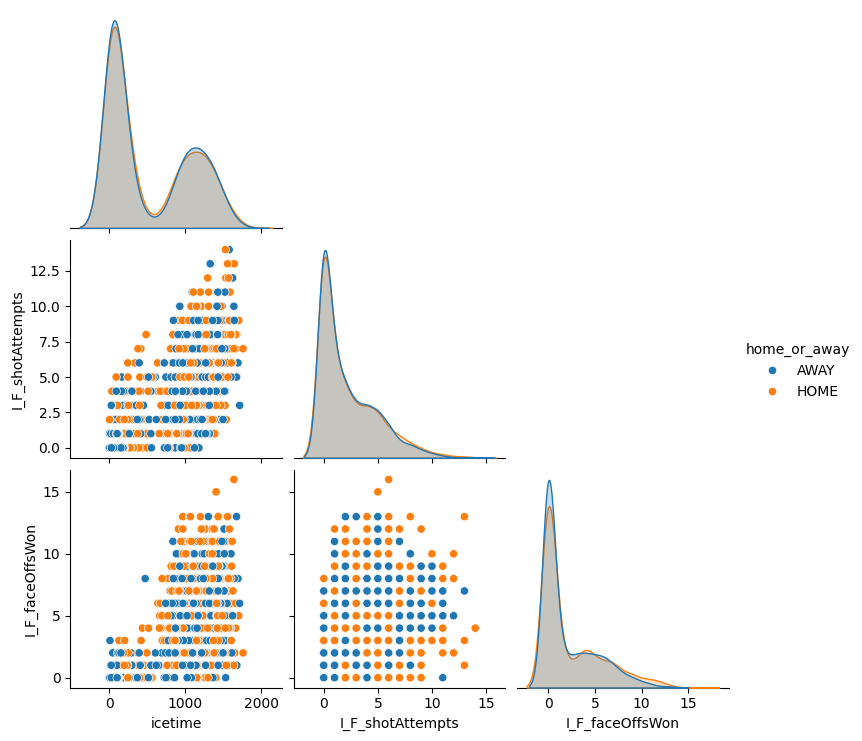

In [6]:
sns.pairplot(df, vars=['icetime', 'I_F_shotAttempts', "I_F_faceOffsWon"], hue='home_or_away', diag_kind='kde', corner=True)


### Q1.5 - <span style="color:red">[9]</span> - You just saw in the diagonal tiles of the figure produced in the previous question (*i.e.*, Q1.4) that the univariate distributions of attributes "icetime", "I_F_shotAttempts" and "I_F_faceOffsWon" are skewed to the left; let's transform them using `np.log10`. Then, instantiate an object from the `sklearn.linear_model.LinearRegression` class with default arguments and train it. For this new model, report the same metrics as you did in Q1.2, *i.e.*, training RMSE, test RMSE, as well as the mean and standard deviation of shuffled cross-validated RMSE over 5 folds. Compare the scores against that of trained in Question 1.2. Which model would you choose?

Caveat: When doing the $log10$ transformation, watch out for values for which the function is undefined. You need to take care of them without introducing new bias to the data.

In [7]:
df["I_F_shotAttempts"] = np.log(df["I_F_shotAttempts"])
df["I_F_faceOffsWon"] = np.log(df["I_F_faceOffsWon"])
X_train, X_test, y_train, y_test = train_test_split(df_encoded.drop('icetime', axis=1), df_encoded['icetime'], test_size=0.3, random_state=seed)
lr = LinearRegression()
lr.fit(X_train, y_train)
train_rmse = mean_squared_error(y_train, lr.predict(X_train), squared=False)
test_rmse = mean_squared_error(y_test, lr.predict(X_test), squared=False)
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=seed)
cv_scores = cross_val_score(lr, df_encoded.drop('icetime', axis=1), df_encoded['icetime'], cv=cv, scoring='neg_root_mean_squared_error')
cv_mean = -cv_scores.mean()
cv_std = cv_scores.std()
print(f'Training RMSE: {train_rmse:.3f}')
print(f'Test RMSE: {test_rmse:.3f}')
print(f'CV mean RMSE: {cv_mean:.3f}')
print(f'CV RMSE std: {cv_std:.3f}')


Training RMSE: 213.646
Test RMSE: 226.569
CV mean RMSE: 222.732
CV RMSE std: 4.209


### Q1.6 - <span style="color:red">[16]</span> - Instantiate and train a cross-validated LASSO object with 5 folds and `random_state=seed`. For the constant that multiplies the penalty term, use a range of numbers from $1e-3$ to $2e-3$ inclusive with a step size of $1e-4$. In other words, $11$ equally spaced values from $1e-3$ to $2e-3$ inclusive. Answer the following questions:
1. What is the model's training RMSE, test RMSE, as well as the mean and standard deviation of shuffled cross-validated RMSE over 5 folds?
2. How does this model perform compared with the previous model, *i.e.*, the one trained in Q1.5?
3. What is the best regularization strength value that the model finds?
4. Compare the average of the absolute values of the fitted parameters of this model against that of the previous model (Q1.5). What do you observe? 
5. Pay closer attention to the fitted parameters of this model. Do you see any zero values? What does it mean and report their corresponding feature names.
6. Which predictor does this model rate as the most important one?

In [10]:
from sklearn.linear_model import LassoCV
alphas = np.linspace(1e-3, 2e-3, 11)
lasso = LassoCV(alphas=alphas, cv=5, random_state=seed)
lasso.fit(X_train, y_train)
train_rmse = mean_squared_error(y_train, lasso.predict(X_train), squared=False)
test_rmse = mean_squared_error(y_test, lasso.predict(X_test), squared=False)
best_alpha = lasso.alpha_

cv_scores = cross_val_score(lasso, df_encoded.drop('icetime', axis=1), df_encoded['icetime'], cv=5, scoring='neg_root_mean_squared_error')
cv_mean = -cv_scores.mean()
cv_std = cv_scores.std()

print("1\n")
print(f'Training RMSE: {train_rmse:.3f}')
print(f'Test RMSE: {test_rmse:.3f}')
print(f'CV mean RMSE: {cv_mean:.3f}')
print(f'CV RMSE std: {cv_std:.3f}')
print("2. The model in 1.5 has higher performance than the model in 1.4. The reason is that the model in 1.5 has lower RMSE and CV RMSE than the model in 1.4 and 1.6\n")
print(f'3. Best Alpha: {best_alpha:.3f}')
print(f'')


1

Training RMSE: 213.645
Test RMSE: 226.565
CV mean RMSE: 230.684
CV RMSE std: 12.323
2. The model in 1.5 has higher performance than the model in 1.4. The reason is that the model in 1.5 has lower RMSE and CV RMSE than the model in 1.4 and 1.6

3. Best Alpha: 0.002



2. 

---
## Question 2 - <span style="color:green">[40]</span> - Classification
In this question, we want to train a classifier using the same dataset but with the "home_or_away" attribute as target. Start with loading the tools and dataset by executing the toolbox cell below.

### <span style="color:orange">Q2 Toolbox</span>

In [11]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import make_scorer, RocCurveDisplay, accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve
from sklearn.pipeline import Pipeline

df2 = pd.read_csv('hockey.csv').drop('opposingTeam', axis=1)
df2.head()

,home_or_away,icetime,gameScore,I_F_primaryAssists,I_F_secondaryAssists,I_F_shotAttempts,I_F_goals,I_F_rebounds,I_F_reboundGoals,I_F_freeze,...,I_F_hits,I_F_takeaways,I_F_giveaways,I_F_lowDangerGoals,I_F_mediumDangerGoals,I_F_highDangerGoals,I_F_unblockedShotAttempts,I_F_dZoneGiveaways,penalityMinutesDrawn,penaltiesDrawn
0,AWAY,118.0,-0.07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AWAY,1087.0,-0.07,0.0,0.0,2.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
2,AWAY,861.0,-0.07,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,AWAY,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,AWAY,108.0,-0.07,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### Q2.1 - <span style="color:red">[5]</span> - Answer the following questions:
1. Is this a binary or multiclass classification problem? Name the labels.
2. Can we say, qualitatively, that this is a balanced classification problem?
3. What label is the majority class?
4. What is the baseline accuracy for this dataset? What does it mean?

In [12]:
np.sum(df2['home_or_away'] == 'AWAY') / df2.shape[0]

0.4990825688073395

1. This is a binary classification problem. The labels are "HOME" and "AWAY".
2. Yes, we can say that this is a balanced classification problem since the number of instances in each class is roughly the same.
3. The majority class is "HOME".
4. The baseline accuracy for this dataset is 50%, it indicates that for a random guess, it has 50% possibility correct.

### Q2.2 - <span style="color:red">[3]</span> - Do stratified training/test split on `df2` with `test_size=0.3`, `random_state=seed`.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(df2.drop('home_or_away', axis=1), df2['home_or_away'], test_size=0.3, random_state=seed)

### Q2.3 - <span style="color:red">[7]</span> - Do/answer the following steps/questions:

1. Instantiate a **logistic regression** model with **Ridge regularization** from the `sklearn.linear_model.SGDClassifier` class.
2. In terms of their approaches to find the best parameters, how the model created in step #1 would be different from a model instantiated from the `sklearn.linear_model.LogisticRegression` class?
3. Should you apply any type of scaling to the data before training the model created in step #1? Why?
4. If you need a scaler, put it together with your model into a pipeline. If you do not need a scaler, still create a pipeline using the model only.

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

ridge = SGDClassifier(loss='log', penalty='l2', random_state=seed)



### Q2.4 - <span style="color:red">[5]</span> - We want to cross-validate the pipeline created in Q2.3 using 5 stratified validation sets. But for the scoring part of the cross-validation, we want to use **error rate** which is defined as $(1-Accuracy)$. First, define a function that takes as input arguments y_true and y_pred, and returns $(1-Accuracy)$. Then, run cross-validation with your custom function as its scorer. Report the mean and standard deviation of the cross-validated **error rate** of your pipeline.

Hint: You may use `make_scorer()` to create a scorer out of your custom function. For example:
```
cross_validate( model, Xtrain, ytrain, cv='YourChosenStrategy', scoring=make_scorer(NameOfYourCustomFunction), n_jobs=-1 )
```

In [ ]:
#

### Q2.5 - <span style="color:red">[3]</span> - Create another pipeline similar to the previous one (in Q2.3) with the only difference being the regularization part. Because, this time you want to use LASSO regularization. Cross-validate it in the same way as you did with the previous pipeline (*i.e.*, in Q 2.4). Report the mean and standard deviation of cross-validated **error rate** for this new pipeline over 5 stratified validation sets.

In [ ]:
#

### Q2.6 - <span style="color:red">[2]</span> - Answer these:
1. Among the models cross-validated in Q 2.4 and Q 2.5, which one would you pick, why?
2. What is the accuracy of your chosen model? Is it worth further investigating the model?

In [ ]:
#

### Q2.7 - <span style="color:red">[3]</span> - Report the Confusion Matrix for the best model. Identify and explain the entries (of the matrix) where your model is doing good and report their values.

In [ ]:
#

### Q2.8 - <span style="color:red">[2]</span> - To your model, what label is the negative class and what label is the positive class?

In [ ]:
#

### Q2.9 - <span style="color:red">[6]</span> - Plot Recall vs Precision for your model over the test set. The stakeholder of the project tells you that they require a minimum recall of 0.1. Answer the following questions:
1. Roughly, what would be the precision of the best model that you can hand over to them?
2. What value should you set for the threshold of the sigmoid function to have your model tuned according to the requirement of the stakeholder?

In [ ]:
#

### Q2.10 - <span style="color:red">[4]</span> - Use `classification_report()` to report the classification metrics of your model over the test set. Answer the following questions based on the output:
1. Out of all the games that the model predicted as "away", what percent were actually "away"?
2. What percentage of the negative class in the sample does the model correctly identify?

Caveat: In your writing, you must make reference to the metric which you are using from the output to support your answer.

In [ ]:
#

---
# Warning!

After uploading your completed notebook to OWL, make sure to click the "Submit for Grading" button and confirm your submission. If your submission is successful, you should receive a confirmation email in your UWO inbox.

